In [84]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import model_selection as ms
from tqdm import tqdm

In [103]:
def normalization(xTrain, xTest):
    std_scale = preprocessing.StandardScaler(with_mean=False)
    cols = list(xTrain.columns)
    xTrain = std_scale.fit_transform(xTrain)
    xTest = std_scale.transform(xTest)
    xTrain = pd.DataFrame(xTrain, columns=cols)
    xTest = pd.DataFrame(xTest, columns=cols)
    return xTrain, xTest

def extract_features(df):
    df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d %H:%M:%S")
    df.insert(loc=0, column='dt_year', value=df['datetime'].dt.year)
    df.insert(loc=0, column='dt_month', value=df['datetime'].dt.month)
    df.insert(loc=0, column='dt_day', value=df['datetime'].dt.day)
    df.insert(loc=0, column='dt_dayofweek', value=df['datetime'].dt.dayofweek)
    df.insert(loc=0, column='dt_hour', value=df['datetime'].dt.hour)
    df = df.drop(columns=['datetime'])
    return df

# use pearson correlation to remove redundant features and features with nan correlation to stock price change
def pearson_graph(dfx, dfy):
    matrix = dfx.to_numpy()
    matrix = np.hstack((dfy['stock_change'].to_numpy()[:,np.newaxis], matrix))
    matrix = matrix.transpose()
    corr = np.ma.corrcoef(matrix)
    corr = np.ma.getdata(corr)
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in tqdm(range(corr.shape[0])):
        if pd.isnull(corr[0,i]):
            if columns[i]:
                columns[i] = False
        for j in range(i+1, corr.shape[0]):
            if corr[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = dfx.columns[columns[1:]]
    return selected_columns, corr

def process():
    X = pd.read_csv("X.csv")
    Y = pd.read_csv("Y.csv")
    x = extract_features(X)
    y = Y.drop(columns=['datetime'])
    
    xTrain_base, xTest_base, yTrain, yTest = ms.train_test_split(x, y, test_size=0.2)
    print('split done')
    selected_columns, corr = pearson_graph(xTrain_base, yTrain)
    print('pearson done')
    xTrain, xTest = normalization(xTrain_base, xTest_base)
    print('normalization done')
    
    xTrain = xTrain[selected_columns[1:]]
    xTest = xTest[selected_columns[1:]]
    
    return xTrain_base, xTest_base, xTrain, xTest, yTrain, yTest

In [104]:
xTrain_base, xTest_base, xTrain, xTest, yTrain, yTest = process()

split done


100%|██████████| 5200/5200 [00:04<00:00, 1047.03it/s]


pearson done
normalization done


In [98]:
xTrain

,dt_dayofweek,dt_day,dt_month,dt_year,list,2020,new,big,online,another,...,young,moving,calling,executives,hill,possibly,meant,drive,mask,system
0,0.000000,1.632518,27.107731,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.77847,0.0
1,0.000000,2.346745,27.107731,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,2.006499,3.060971,24.643392,2020.0,1.874578,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,3.009748,2.958939,27.107731,2020.0,0.000000,1.975706,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,2.006499,2.754874,27.107731,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,2.006499,0.408129,29.572070,2020.0,0.000000,0.000000,0.000000,0.000000,3.173266,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
687,1.504874,0.510162,27.107731,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
688,1.003249,0.204065,29.572070,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
689,0.000000,3.060971,27.107731,2020.0,0.000000,0.000000,1.614777,2.263956,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [107]:
sklearn_PCA = PCA(n_components=0.95, svd_solver='full')
x_train = sklearn_PCA.fit_transform(xTrain)
x_test = sklearn_PCA.transform(xTest)

In [105]:
#x_train = xTrain.to_numpy()
#x_test = xTest.to_numpy()
y_train = yTrain.to_numpy()
y_test = yTest.to_numpy()

In [114]:
# Linear Regression (Closed)
lr = LinearRegression().fit(x_train, y_train)
yHat_lr_train = lr.predict(x_train)
lr_trainAcc = lr.score(x_train, y_train)
yHat_lr_test = lr.predict(x_test)
lr_testAcc = lr.score(x_test, y_test)

# Lasso Regression
lasr = Lasso(alpha=0.1).fit(x_train, y_train)
yHat_lasr_train = lasr.predict(x_train)
lasr_trainAcc = lasr.score(x_train, y_train)
yHat_lasr_test = lasr.predict(x_test)
lasr_testAcc = lasr.score(x_test, y_test)

# Ridge Regression
ridr = Ridge(alpha=50).fit(x_train, y_train)
yHat_ridr_train = ridr.predict(x_train)
ridr_trainAcc = ridr.score(x_train, y_train)
yHat_ridr_test = ridr.predict(x_test)
ridr_testAcc = ridr.score(x_test, y_test)

# ElasticNet
elr = ElasticNet(alpha=0.1, l1_ratio=0.1).fit(x_train, y_train)
yHat_elr_train = elr.predict(x_train)
elr_trainAcc = elr.score(x_train, y_train)
yHat_elr_test = elr.predict(x_test)
elr_testAcc = elr.score(x_test, y_test)

# Print Statistics
print("Model R^2 Scores")
print("Linear Regression (Closed): [train]{} [test]{}".format(lr_trainAcc, lr_testAcc))
print("Lasso Regression: [train]{} [test]{}".format(lasr_trainAcc, lasr_testAcc))
print("Ridge Regression: [train]{} [test]{}".format(ridr_trainAcc, ridr_testAcc))
print("Elastic Net: [train]{} [test]{}".format(elr_trainAcc, elr_testAcc))

Model R^2 Scores
Linear Regression (Closed): [train]0.8526437658410991 [test]0.3029393496092977
Lasso Regression: [train]0.8225309577909807 [test]0.3175640655463876
Ridge Regression: [train]0.8524334530985935 [test]0.3065583157455537
Elastic Net: [train]0.8514828009587517 [test]0.310610522328856


In [110]:
train_sorted = pd.DataFrame()
train_sorted['datetime'] = xTrain_base['dt_hour']+xTrain_base['dt_day']*24+xTrain_base['dt_month']*24*30
train_sorted['y'] = yTrain['stock_change']
train_sorted['yHat_lr'] = yHat_lr_train
train_sorted['yHat_lasr'] = yHat_lasr_train
train_sorted['yHat_ridr'] = yHat_ridr_train
train_sorted['yHat_elr'] = yHat_elr_train
train_sorted = train_sorted.sort_values('datetime')

test_sorted = pd.DataFrame()
test_sorted['datetime'] = xTest_base['dt_hour']+xTest_base['dt_day']*24+xTest_base['dt_month']*24*30
test_sorted['y'] = yTest['stock_change']
test_sorted['yHat_lr'] = yHat_lr_test
test_sorted['yHat_lasr'] = yHat_lasr_test
test_sorted['yHat_ridr'] = yHat_ridr_test
test_sorted['yHat_elr'] = yHat_elr_test
test_sorted = test_sorted.sort_values('datetime')

In [111]:
yTrain_sorted = train_sorted['y']
yHat_lr_train_sorted = train_sorted['yHat_lr']
yHat_lasr_train_sorted = train_sorted['yHat_lasr']
yHat_ridr_train_sorted = train_sorted['yHat_ridr']
yHat_elr_train_sorted = train_sorted['yHat_elr']

yTest_sorted = test_sorted['y']
yHat_lr_test_sorted = test_sorted['yHat_lr']
yHat_lasr_test_sorted = test_sorted['yHat_lasr']
yHat_ridr_test_sorted = test_sorted['yHat_ridr']
yHat_elr_test_sorted = test_sorted['yHat_elr']

Text(0, 0.5, 'Daily stockprice change')

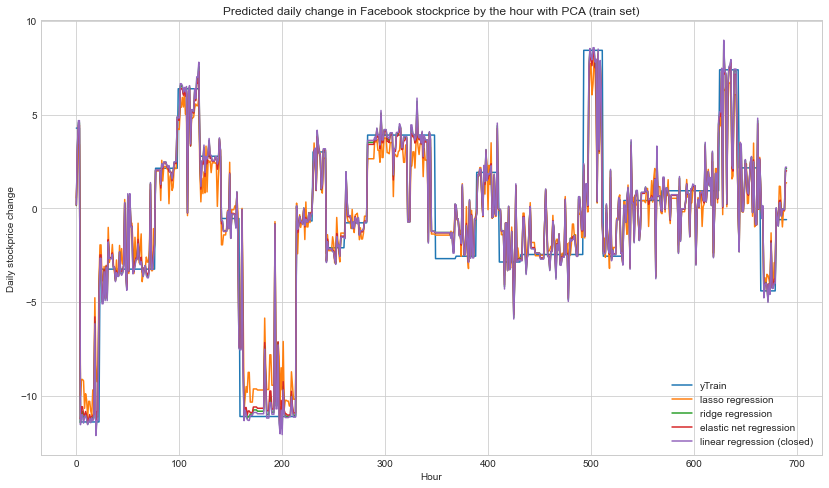

In [116]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14,8))
ax = plt.axes()
plt.plot(range(len(yTrain)), yTrain_sorted, label="yTrain")
plt.plot(range(len(yTrain)), yHat_lasr_train_sorted, label="lasso regression")
plt.plot(range(len(yTrain)), yHat_ridr_train_sorted, label="ridge regression")
plt.plot(range(len(yTrain)), yHat_elr_train_sorted, label="elastic net regression")
plt.plot(range(len(yTrain)), yHat_lr_train_sorted, label="linear regression (closed)")
plt.legend()
plt.title("Predicted daily change in Facebook stockprice by the hour with PCA (train set)")
plt.xlabel("Hour")
plt.ylabel("Daily stockprice change")

Text(0, 0.5, 'Daily stockprice change')

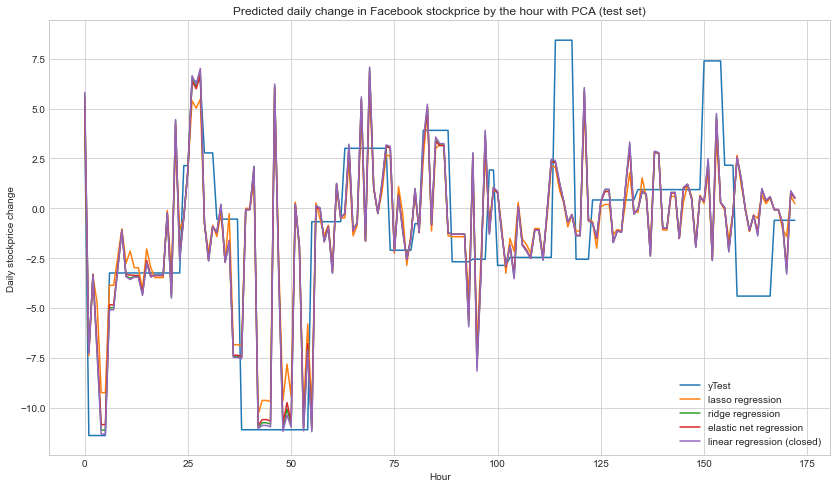

In [119]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14,8))
ax = plt.axes()
plt.plot(range(len(yTest)), yTest_sorted, label="yTest")
plt.plot(range(len(yTest)), yHat_lasr_test_sorted, label="lasso regression")
plt.plot(range(len(yTest)), yHat_ridr_test_sorted, label="ridge regression")
plt.plot(range(len(yTest)), yHat_elr_test_sorted, label="elastic net regression")
plt.plot(range(len(yTest)), yHat_lr_test_sorted, label="linear regression (closed)")
plt.legend()
plt.title("Predicted daily change in Facebook stockprice by the hour with PCA (test set)")
plt.xlabel("Hour")
plt.ylabel("Daily stockprice change")